In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 19:20:41 2019

@author: rangeet
"""


from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
import keras
from keras import backend
from keras.models import load_model
import tensorflow as tf
import foolbox
from foolbox.attacks import SaliencyMapAttack
from foolbox.criteria import Misclassification

from matplotlib import pyplot as plt
import scipy.misc
# Set the matplotlib figure size
plt.rc('figure', figsize = (12.0, 12.0))

# Set the learning phase to false, the model is pre-trained.
backend.set_learning_phase(False)
keras_model = load_model('Jan-13-2018.hdf5')




seed = 27

raw_data = pd.read_csv("train.csv")
print(raw_data.head())
print(raw_data.shape, 28*28)
ones = raw_data[raw_data["label"] == 1]
print(ones.shape)
zeros = raw_data[raw_data["label"] == 0]
print(zeros.shape)
two = raw_data[raw_data["label"] == 2]

three = raw_data[raw_data["label"] == 3]

four = raw_data[raw_data["label"] == 4]

five = raw_data[raw_data["label"] == 5]

six = raw_data[raw_data["label"] == 6]

seven = raw_data[raw_data["label"] == 7]

eight = raw_data[raw_data["label"] == 8]

nine = raw_data[raw_data["label"] == 9]

train, validate = train_test_split(raw_data, 
                                   test_size=0.1,
                                   random_state = seed, 
                                   stratify = raw_data['label'])

# Split into input (X) and output (Y) variables
x_validation = validate.values[:,1:].reshape(4200,28,28, 1)
y_validation = validate.values[:,0]


tf.set_random_seed(1234)

if not hasattr(backend, "tf"):
    raise RuntimeError("This tutorial requires keras to be configured"
                       " to use the TensorFlow backend.")

if keras.backend.image_dim_ordering() != 'tf':
    keras.backend.set_image_dim_ordering('tf')
    print("INFO: '~/.keras/keras.json' sets 'image_dim_ordering' to "
          "'th', temporarily setting to 'tf'")

# Retrieve the tensorflow session
sess =  backend.get_session()

# Define input TF placeholder
x = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
y = tf.placeholder(tf.float32, shape=(None, 10))

# Evaluate the model's accuracy on the validation data used in training
x_validation = x_validation.astype('float32')
x_validation /= 255
#ZERO
zeros_reshaped = zeros.values[:,1:].reshape(4132,28,28,1)
zeros_reshaped_norm = zeros_reshaped.astype('float32')
zeros_reshaped_norm = zeros_reshaped_norm/255
print(zeros_reshaped.shape)
zeros_labels = zeros.values[:,0]

predone = np.argmax(keras_model.predict(zeros_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, zeros_labels))
print(accone)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         

TypeError: unsupported operand type(s) for *: 'SaliencyMapAttack' and 'int'

In [13]:
fmodel = foolbox.models.KerasModel(keras_model, bounds=(0,1))

In [34]:
adversarial_images_Zero=[]
#Zero
attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
for i in range(0,4132) :   
    img = zeros_reshaped_norm[i]
    label = zeros_labels[i]
    adversarial = attack(img, label)
    adversarial_images_Zero.append(adversarial)

/Users/rangeet/anaconda3/lib/python3.7/site-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [35]:
images=zeros_reshaped_norm.reshape(4132,28,28)
adversarial =adversarial.reshape(28,28)

In [38]:
#zero
for i in range(0,20):
    images_one = images[i]
    scipy.misc.imsave('zero_new{0}_Salient.jpg'.format(i), images_one)
    ad_one = adversarial_images_Zero[i].reshape(28,28)
    scipy.misc.imsave('Zero_new_adv{0}_Salient.jpg'.format(i), ad_one)
    difference = ad_one - images_one
    scipy.misc.imsave('Zero_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)
    

/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [47]:
#one
one_reshaped = ones.values[:,1:].reshape(4684,28,28,1)
one_reshaped_norm = one_reshaped.astype('float32')
one_reshaped_norm = one_reshaped_norm/255
print(one_reshaped.shape)
one_labels = ones.values[:,0]

predone = np.argmax(keras_model.predict(one_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, one_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_One=[]
for i in range(0,20) :   
    img = one_reshaped_norm[i]
    label = one_labels[i]
    adversarial = attack(img, label)
    x_adv=adversarial.reshape(1,28,28,1)
    adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
    print("One pred is ",adv_pred)
    adv_acc =  np.mean(np.equal(adv_pred, one_labels[i]))
    print("The adversarial validation accuracy is: {}".format(adv_acc))
    adversarial_images_One.append(adversarial)
images=one_reshaped_norm.reshape(4684,28,28)
adversarial =adversarial.reshape(28,28)
for i in range(0,20):
    images_one = images[i]
    scipy.misc.imsave('one_new{0}_Salient.jpg'.format(i), images_one)
    ad_one = adversarial_images_One[i].reshape(28,28)
    scipy.misc.imsave('one_new_adv{0}_Salient.jpg'.format(i), ad_one)
    difference = ad_one - images_one
    scipy.misc.imsave('one_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4684, 28, 28, 1)
0.9972245943637916
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [3]
The adversarial validation accuracy is: 0.0
One pred is  [8]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [3]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [8]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accuracy is: 0.0
One pred is  [7]
The adversarial validation accu

/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [48]:
#two
two_reshaped = two.values[:,1:].reshape(4177,28,28,1)
two_reshaped_norm = two_reshaped.astype('float32')
two_reshaped_norm = two_reshaped_norm/255
print(two_reshaped.shape)
two_labels = two.values[:,0]

predone = np.argmax(keras_model.predict(two_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, two_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_Two=[]
for i in range(0,20) :   
    img = two_reshaped_norm[i]
    label = two_labels[i]
    adversarial = attack(img, label)
    x_adv=adversarial.reshape(1,28,28,1)
    adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
    print("Two pred is ",adv_pred)
    adv_acc =  np.mean(np.equal(adv_pred, two_labels[i]))
    print("The adversarial validation accuracy is: {}".format(adv_acc))
    adversarial_images_Two.append(adversarial)
images=two_reshaped_norm.reshape(4177,28,28)
adversarial =adversarial.reshape(28,28)
for i in range(0,20):
    images_two = images[i]
    scipy.misc.imsave('two_new{0}_Salient.jpg'.format(i), images_two)
    ad_two = adversarial_images_Two[i].reshape(28,28)
    scipy.misc.imsave('two_new_adv{0}_Salient.jpg'.format(i), ad_two)
    difference = ad_two - images_two
    scipy.misc.imsave('two_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4177, 28, 28, 1)
0.9897055302848935
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [9]
The adversarial validation accuracy is: 0.0
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [1]
The adversarial validation accuracy is: 0.0
Two pred is  [8]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accuracy is: 0.0
Two pred is  [7]
The adversarial validation accuracy is: 0.0
Two pred is  [3]
The adversarial validation accu

/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [55]:
#Three
three_reshaped = three.values[:,1:].reshape(4351,28,28,1)
three_reshaped_norm = three_reshaped.astype('float32')
three_reshaped_norm = three_reshaped_norm/255
print(three_reshaped.shape)
three_labels = three.values[:,0]

predone = np.argmax(keras_model.predict(three_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, three_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_three=[]
for i in range(3,20) :   
    img = three_reshaped_norm[i]
    label = three_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("three pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, three_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_three.append(adversarial)
        images=three_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_three = images
        scipy.misc.imsave('three_new{0}_Salient.jpg'.format(i), images_three)
        ad_three = adversarial.reshape(28,28)
        scipy.misc.imsave('three_new_adv{0}_Salient.jpg'.format(i), ad_three)
        difference = ad_three - images_three
        scipy.misc.imsave('three_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)


(4351, 28, 28, 1)
0.9988508388876121
three pred is  [5]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


three pred is  [8]
The adversarial validation accuracy is: 0.0
three pred is  [7]
The adversarial validation accuracy is: 0.0
three pred is  [5]
The adversarial validation accuracy is: 0.0
three pred is  [5]
The adversarial validation accuracy is: 0.0
three pred is  [2]
The adversarial validation accuracy is: 0.0
three pred is  [1]
The adversarial validation accuracy is: 0.0
three pred is  [8]
The adversarial validation accuracy is: 0.0
three pred is  [8]
The adversarial validation accuracy is: 0.0
three pred is  [7]
The adversarial validation accuracy is: 0.0


In [57]:
#four

four_reshaped = four.values[:,1:].reshape(4072,28,28,1)
four_reshaped_norm = four_reshaped.astype('float32')
four_reshaped_norm = four_reshaped_norm/255
print(four_reshaped.shape)
four_labels = four.values[:,0]

predone = np.argmax(keras_model.predict(four_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, four_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_four=[]
for i in range(0,20) :   
    img = four_reshaped_norm[i]
    label = four_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("four pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, four_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_four.append(adversarial)
        images=four_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_four = images
        scipy.misc.imsave('four_new{0}_Salient.jpg'.format(i), images_four)
        ad_four = adversarial.reshape(28,28)
        scipy.misc.imsave('four_new_adv{0}_Salient.jpg'.format(i), ad_four)
        difference = ad_four - images_four
        scipy.misc.imsave('four_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4072, 28, 28, 1)
0.9963163064833006
four pred is  [9]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


four pred is  [8]
The adversarial validation accuracy is: 0.0
four pred is  [3]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [7]
The adversarial validation accuracy is: 0.0
four pred is  [7]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [8]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [7]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [9]
The adversarial validation accuracy is: 0.0
four pred is  [7]
The adversarial validation accuracy is: 0.0
four pre

In [58]:
#five

five_reshaped = five.values[:,1:].reshape(3795,28,28,1)
five_reshaped_norm = five_reshaped.astype('float32')
five_reshaped_norm = five_reshaped_norm/255
print(five_reshaped.shape)
five_labels = five.values[:,0]

predone = np.argmax(keras_model.predict(five_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, five_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_five=[]
for i in range(3,20) :   
    img = five_reshaped_norm[i]
    label = five_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("five pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, five_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_five.append(adversarial)
        images=five_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_five = images
        scipy.misc.imsave('five_new{0}_Salient.jpg'.format(i), images_five)
        ad_five = adversarial.reshape(28,28)
        scipy.misc.imsave('five_new_adv{0}_Salient.jpg'.format(i), ad_five)
        difference = ad_five - images_five
        scipy.misc.imsave('five_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(3795, 28, 28, 1)
0.9939393939393939
five pred is  [9]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [8]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/Users/rangeet/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/rangeet/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


five pred is  [8]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [9]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0
five pred is  [3]
The adversarial validation accuracy is: 0.0


In [59]:
#six

six_reshaped = six.values[:,1:].reshape(4137,28,28,1)
six_reshaped_norm = six_reshaped.astype('float32')
six_reshaped_norm = six_reshaped_norm/255
print(six_reshaped.shape)
six_labels = six.values[:,0]

predone = np.argmax(keras_model.predict(six_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, six_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_six=[]
for i in range(0,20) :   
    img = six_reshaped_norm[i]
    label = six_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("six pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, six_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_six.append(adversarial)
        images=six_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_six = images
        scipy.misc.imsave('six_new{0}_Salient.jpg'.format(i), images_six)
        ad_six = adversarial.reshape(28,28)
        scipy.misc.imsave('six_new_adv{0}_Salient.jpg'.format(i), ad_six)
        difference = ad_six - images_six
        scipy.misc.imsave('six_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4137, 28, 28, 1)
0.9963741841914431
six pred is  [3]
The adversarial validation accuracy is: 0.0
six pred is  [4]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


six pred is  [8]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [8]
The adversarial validation accuracy is: 0.0
six pred is  [4]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


six pred is  [0]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [0]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [0]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0
six pred is  [5]
The adversarial validation accuracy is: 0.0


In [60]:
#seven

seven_reshaped = seven.values[:,1:].reshape(4401,28,28,1)
seven_reshaped_norm = seven_reshaped.astype('float32')
seven_reshaped_norm = seven_reshaped_norm/255
print(seven_reshaped.shape)
seven_labels = seven.values[:,0]

predone = np.argmax(keras_model.predict(seven_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, seven_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_seven=[]
for i in range(0,20) :   
    img = seven_reshaped_norm[i]
    label = seven_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("seven pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, seven_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_seven.append(adversarial)
        images=seven_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_seven = images
        scipy.misc.imsave('seven_new{0}_Salient.jpg'.format(i), images_seven)
        ad_seven = adversarial.reshape(28,28)
        scipy.misc.imsave('seven_new_adv{0}_Salient.jpg'.format(i), ad_seven)
        difference = ad_seven - images_seven
        scipy.misc.imsave('seven_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4401, 28, 28, 1)
0.998863894569416
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


seven pred is  [9]
The adversarial validation accuracy is: 0.0
seven pred is  [2]
The adversarial validation accuracy is: 0.0
seven pred is  [9]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [2]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [4]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [2]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [2]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy is: 0.0
seven pred is  [3]
The adversarial validation accuracy 

In [61]:
#eight

eight_reshaped = eight.values[:,1:].reshape(4063,28,28,1)
eight_reshaped_norm = eight_reshaped.astype('float32')
eight_reshaped_norm = eight_reshaped_norm/255
print(eight_reshaped.shape)
eight_labels = eight.values[:,0]

predone = np.argmax(keras_model.predict(eight_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, eight_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_eight=[]
for i in range(0,20) :   
    img = eight_reshaped_norm[i]
    label = eight_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("eight pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, eight_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_eight.append(adversarial)
        images=eight_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_eight = images
        scipy.misc.imsave('eight_new{0}_Salient.jpg'.format(i), images_eight)
        ad_eight = adversarial.reshape(28,28)
        scipy.misc.imsave('eight_new_adv{0}_Salient.jpg'.format(i), ad_eight)
        difference = ad_eight - images_eight
        scipy.misc.imsave('eight_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4063, 28, 28, 1)
0.9886783165148905
eight pred is  [3]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [4]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [9]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [2]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy is: 0.0
eight pred is  [3]
The adversarial validation accuracy 

In [62]:
#nine

nine_reshaped = nine.values[:,1:].reshape(4188,28,28,1)
nine_reshaped_norm = nine_reshaped.astype('float32')
nine_reshaped_norm = nine_reshaped_norm/255
print(nine_reshaped.shape)
nine_labels = nine.values[:,0]

predone = np.argmax(keras_model.predict(nine_reshaped_norm), axis = 1)
accone = np.mean(np.equal(predone, nine_labels))
print(accone)
#attack=foolbox.attacks.FGSM(fmodel, criterion=Misclassification())
adversarial_images_nine=[]
for i in range(0,20) :   
    img = nine_reshaped_norm[i]
    label = nine_labels[i]
    adversarial = attack(img, label)
    if adversarial is not None:
        x_adv=adversarial.reshape(1,28,28,1)
        adv_pred = np.argmax(keras_model.predict(x_adv), axis = 1)
        print("nine pred is ",adv_pred)
        adv_acc =  np.mean(np.equal(adv_pred, nine_labels[i]))
        print("The adversarial validation accuracy is: {}".format(adv_acc))
        adversarial_images_nine.append(adversarial)
        images=nine_reshaped_norm[i].reshape(28,28)
        adversarial =adversarial.reshape(28,28)
        images_nine = images
        scipy.misc.imsave('nine_new{0}_Salient.jpg'.format(i), images_nine)
        ad_nine = adversarial.reshape(28,28)
        scipy.misc.imsave('nine_new_adv{0}_Salient.jpg'.format(i), ad_nine)
        difference = ad_nine - images_nine
        scipy.misc.imsave('nine_new_adv{0}_Diff.jpg'.format(i), difference / abs(difference).max() * 0.2 + 0.5)

(4188, 28, 28, 1)
0.9911652340019103
nine pred is  [4]
The adversarial validation accuracy is: 0.0


/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/Users/rangeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [8]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [8]
The adversarial validation accuracy is: 0.0
nine pred is  [8]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [7]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pred is  [4]
The adversarial validation accuracy is: 0.0
nine pre

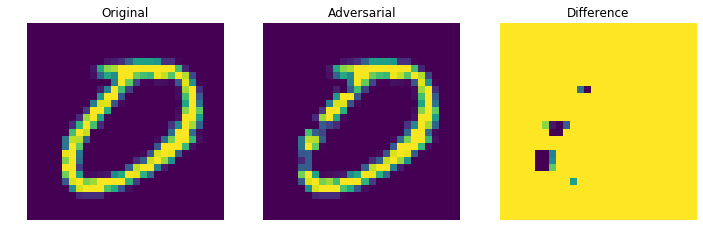

In [33]:
plt.figure()
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(images)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial - images
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')
plt.show()